# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# 2. Read Dataset

In [2]:
train_df = pd.read_csv("trainp.csv")
train_df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


Categorical features: These features have categories ('Accident_Type_Code', 'Days_Since_Inspection', 'Violations')

Numerical features: These features have numerical values ('Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric')

# 3. Exploratory Data Analysis

In [3]:
print("The total number of Rows in Train dataset is : ", train_df.shape[0])

The total number of Rows in Train dataset is :  10000


In [4]:
train_df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

Severity is the target variable we want to classify

In [5]:
train_df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [6]:
print(" The number of columns with NaN values : {} ".format(train_df.isnull().sum().sum()))

 The number of columns with NaN values : 0 


We can drop the Accident ID as it is of no use

In [7]:
train_df = train_df.drop(['Accident_ID'], axis = "columns")

In [8]:
train_df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

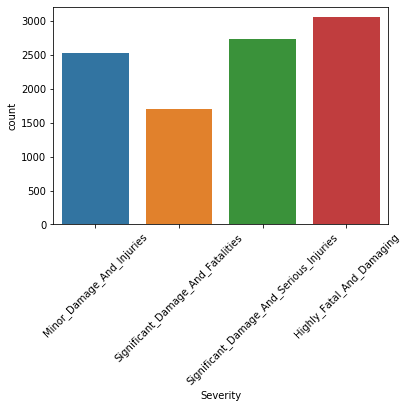

In [9]:
sns.countplot(train_df['Severity'])
plt.xticks(rotation = 45)

The data distribution is almost even. only little class imbalance.

In [10]:
train_df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378


There is a lot of difference between the ranges of the features, so we might have to normalize or standardize the data before performing classification

# Checking Distribution

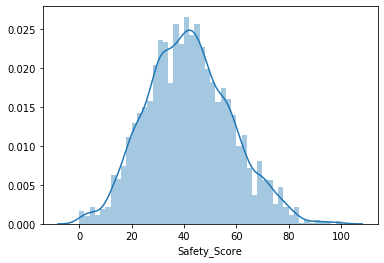

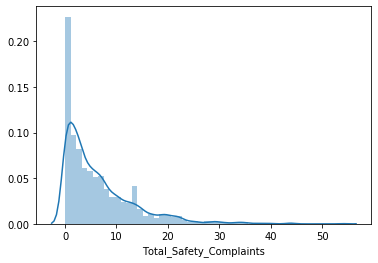

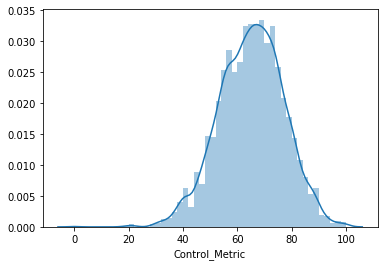

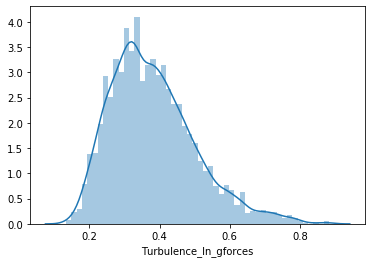

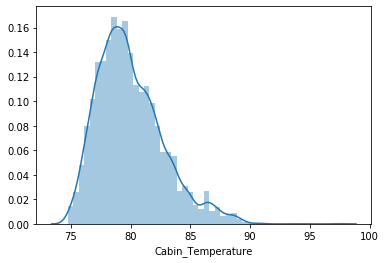

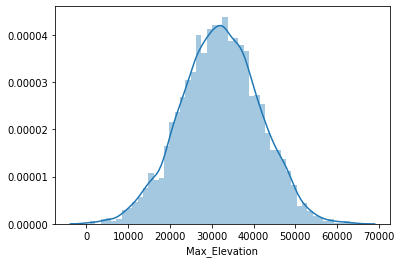

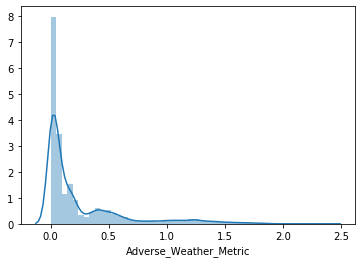

In [11]:
numeric_names = ['Safety_Score', 'Total_Safety_Complaints',
                        'Control_Metric', 'Turbulence_In_gforces',
                       'Cabin_Temperature',  'Max_Elevation',
                        'Adverse_Weather_Metric'                       
                       ]
for i in numeric_names:
    sns.distplot(train_df[i])
    plt.show()

We can see that Adverse_Weather_Metric and Total_Safety_Complaints are in Pareto Distribution, so we have to convert it to Gaussian Distribution

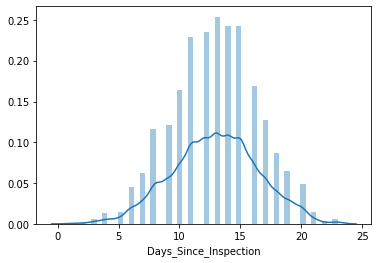

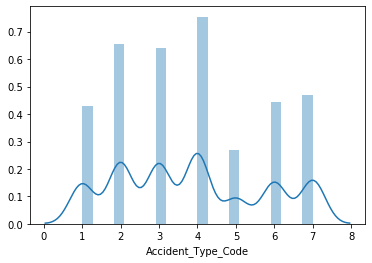

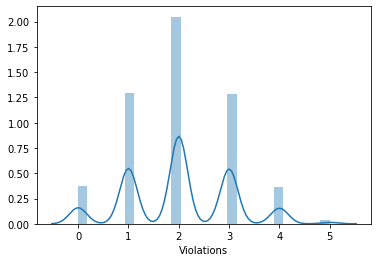

In [12]:
categorical_names = ['Days_Since_Inspection','Accident_Type_Code','Violations']
for i in categorical_names:
    sns.distplot(train_df[i])
    plt.show()

In [13]:
train_df['Adverse_Weather_Metric']=np.log(train_df['Adverse_Weather_Metric'])
train_df['Total_Safety_Complaints']=np.log(train_df['Total_Safety_Complaints']+1)

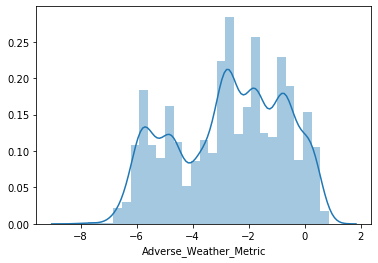

In [14]:
sns.distplot(train_df['Adverse_Weather_Metric'])

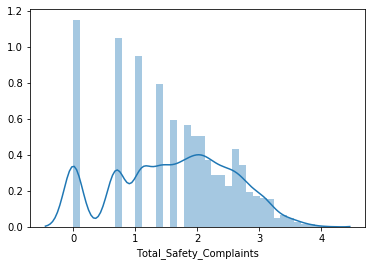

In [15]:
sns.distplot(train_df['Total_Safety_Complaints'])

In [16]:
x = train_df.drop('Severity', axis = 1)
y = train_df['Severity']

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit(x[numeric_names])
x_quan=pd.DataFrame(ss.transform(x[numeric_names]),columns=numeric_names,index=x.index)
x[numeric_names]=x_quan


# Violin Plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

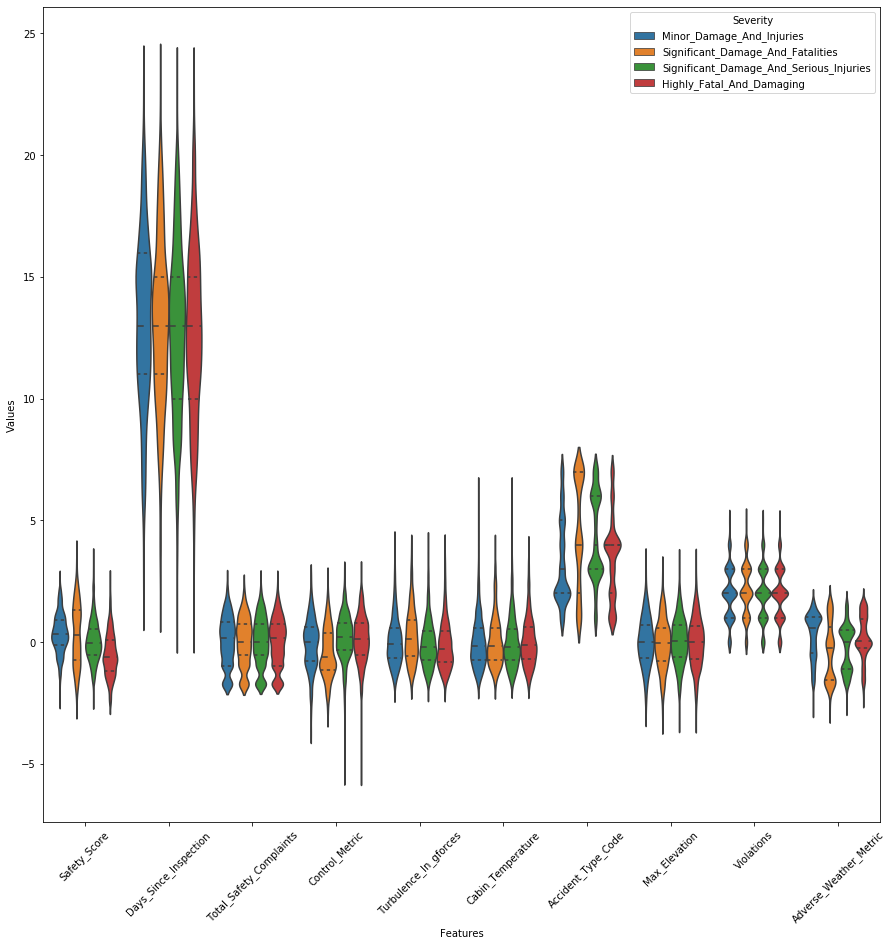

In [18]:
data_temp = pd.concat([y, x], axis = 1)
data_plot = pd.melt(data_temp, id_vars = 'Severity', var_name = 'Features', value_name = 'Values')
plt.figure(figsize = (15, 15))
sns.violinplot(x = "Features", y = "Values", hue = "Severity", data = data_plot, inner = "quartile")
plt.xticks(rotation = 45)

We can see Accident_Type_Code, Control_Metric are good features for classification

# Boxplot

Used to check for Outlier Points

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

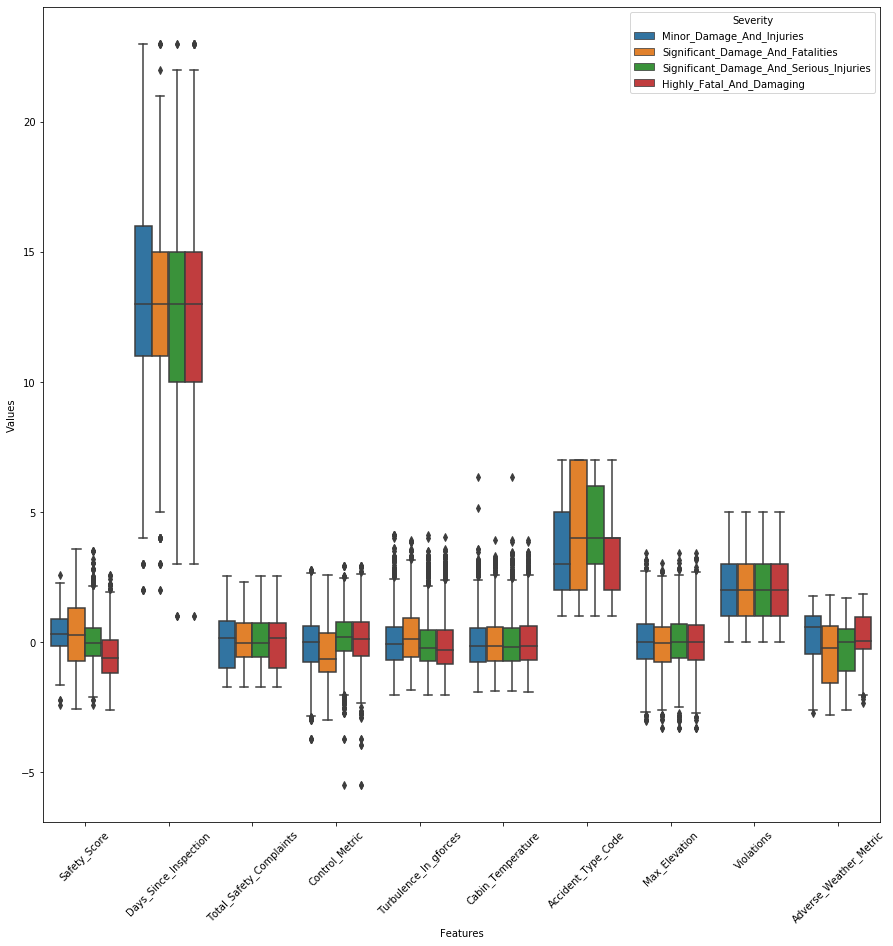

In [19]:
plt.figure(figsize = (15, 15))
sns.boxplot(x = "Features", y = "Values", data = data_plot, hue = "Severity")
plt.xticks(rotation = 45)

# Correlation between Numerical Data

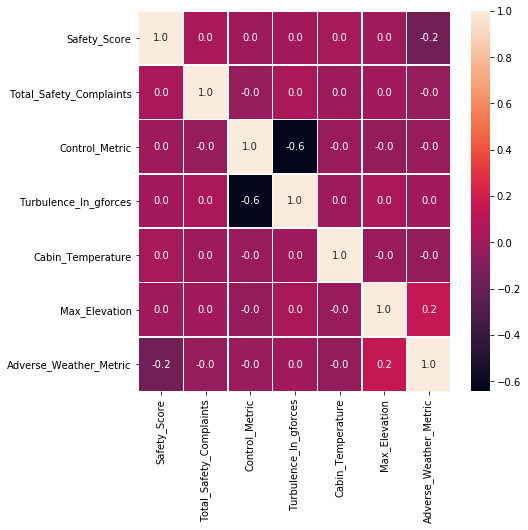

In [67]:
numeric_cols = train_df[['Safety_Score', 'Total_Safety_Complaints',
                        'Control_Metric', 'Turbulence_In_gforces',
                       'Cabin_Temperature',  'Max_Elevation',
                        'Adverse_Weather_Metric'                       
                       ]]

matrix = numeric_cols.corr()
feature, axis = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, annot = True, linewidth=0.5, fmt = '.1f', ax = axis)

# Checking Best Features

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
#Giving scores to features for their involvment in deciding label 
bestfeatures = SelectKBest()
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))

                    Specs       Score
0            Safety_Score  531.328575
6      Accident_Type_Code  248.647265
9  Adverse_Weather_Metric  243.283564
3          Control_Metric  164.096446
4   Turbulence_In_gforces   57.518652
8              Violations   17.335431
1   Days_Since_Inspection    8.084658
7           Max_Elevation    4.545871
5       Cabin_Temperature    1.491605


# 4. Train-Test Data Split

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=723,stratify=y, shuffle = True)

In [86]:
def sensi(m):
    fp_1=m.iloc[0,1]+m.iloc[0,2]+m.iloc[0,3]
    fp_2=m.iloc[1,0]+m.iloc[1,2]+m.iloc[1,3]
    fp_3=m.iloc[2,0]+m.iloc[2,1]+m.iloc[2,3]
    fp_4=m.iloc[3,0]+m.iloc[3,1]+m.iloc[3,2]
    tn_1=m.iloc[1,1]+m.iloc[2,2]+m.iloc[3,3]
    tn_2=m.iloc[0,0]+m.iloc[2,2]+m.iloc[3,3]
    tn_3=m.iloc[0,0]+m.iloc[1,1]+m.iloc[3,3]
    tn_4=m.iloc[1,1]+m.iloc[2,2]+m.iloc[0,0]
    tp_1=m.iloc[0,0]
    tp_2=m.iloc[1,1]
    tp_3=m.iloc[2,2]
    tp_4=m.iloc[3,3]
    fn_1=m.iloc[1,0]+m.iloc[2,0]+m.iloc[3,0]
    fn_2=m.iloc[0,1]+m.iloc[2,1]+m.iloc[3,1]
    fn_3=m.iloc[0,2]+m.iloc[1,2]+m.iloc[3,2]
    fn_4=m.iloc[1,3]+m.iloc[2,3]+m.iloc[0,3]
    spe_1=tn_1/(tn_1+fp_1)
    spe_2=tn_2/(tn_1+fp_2)
    spe_3=tn_3/(tn_1+fp_3)
    spe_4=tn_4/(tn_4+fp_4)
    sen_1=tp_1/(tp_1+fn_1)
    sen_2=tp_2/(tp_2+fn_2)
    sen_3=tp_3/(tp_3+fn_3)
    sen_4=tp_4/(tp_4+fn_4)
    l=[[sen_1,spe_1],[sen_2,spe_2],[sen_3,spe_3],[sen_4,spe_4]]
    mat=pd.DataFrame(l,index=['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries',
                         'Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'],
                columns=['Senstivity','Specificity'])
    return mat

# 5. Gradient Boosting Classifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators=200,max_depth=4,verbose=True)

In [25]:
gbc.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1        8633.0266           11.73s
         2        7930.9966           12.02s
         3        7360.4660           12.55s
         4        6899.3181           12.93s
         5        6509.7105           12.78s
         6        6188.0383           12.63s
         7        5894.5873           12.50s
         8        5628.4045           12.58s
         9        5398.9786           12.48s
        10        5195.9930           12.37s
        20        3746.3969           11.63s
        30        2933.6646           10.88s
        40        2413.7671           10.28s
        50        2067.9461            9.61s
        60        1858.6584            8.93s
        70        1694.4748            8.43s
        80        1510.1699            7.78s
        90        1362.4063            7.11s
       100        1204.3505            6.45s
       200         507.1147            0.00s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=True,
                           warm_start=False)

In [26]:
pred = gbc.predict(X_test)

In [27]:
acc = gbc.score(X_train,y_train)
print("Accuracy on training set : " + str(acc))

Accuracy on training set : 0.9937142857142857


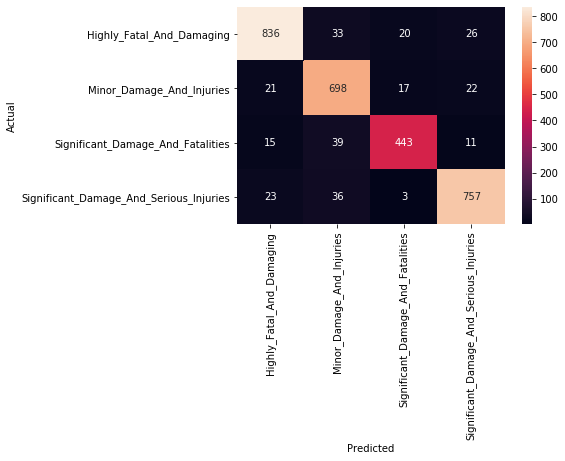

In [71]:
m = pd.crosstab(y_test, pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(m, annot=True, fmt="d")

In [87]:
mat = sensi(m)
mat

,Senstivity,Specificity
Highly_Fatal_And_Damaging,0.660714,0.864551
Minor_Damage_And_Injuries,0.613095,0.986765
Significant_Damage_And_Fatalities,0.358362,1.152632
Significant_Damage_And_Serious_Injuries,0.665328,0.808561


In [28]:
acc = gbc.score(X_test,y_test)
print("Accuracy is : " + str(acc))

Accuracy is : 0.9416666666666667


# 6. Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ran = RandomForestClassifier(n_estimators = 100, verbose=True, n_jobs = -1)


In [31]:
ran.fit(X_train, y_train)
y_pred = ran.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [33]:
pred = ran.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


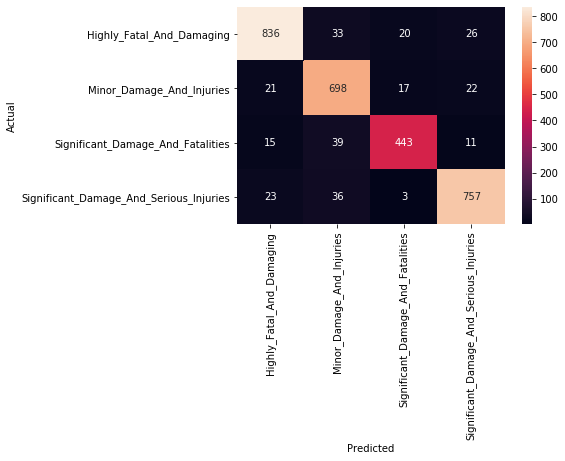

In [77]:
m = pd.crosstab(y_test, pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(m, annot=True, fmt="d")

In [88]:
mat = sensi(m)
mat

,Senstivity,Specificity
Highly_Fatal_And_Damaging,0.660714,0.864551
Minor_Damage_And_Injuries,0.613095,0.986765
Significant_Damage_And_Fatalities,0.358362,1.152632
Significant_Damage_And_Serious_Injuries,0.665328,0.808561


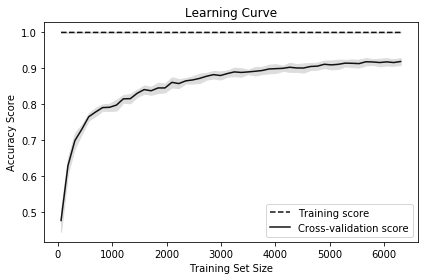

In [53]:
train_sizes, train_scores, test_scores = learning_curve(ran, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is : " + str(accuracy))

Accuracy is : 0.9113333333333333


# 7. Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [39]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy is :",accuracy_score(y_test, y_pred))

Accuracy: 0.454


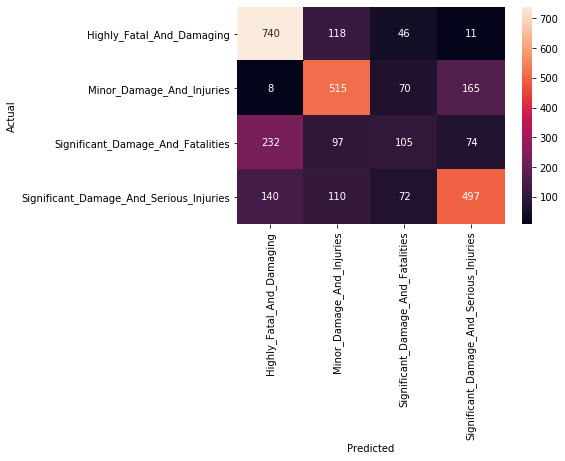

In [78]:
m = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(m, annot=True, fmt="d")

In [89]:
mat = sensi(m)
mat

,Senstivity,Specificity
Highly_Fatal_And_Damaging,0.660714,0.864551
Minor_Damage_And_Injuries,0.613095,0.986765
Significant_Damage_And_Fatalities,0.358362,1.152632
Significant_Damage_And_Serious_Injuries,0.665328,0.808561


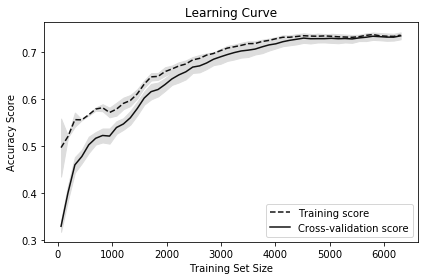

In [61]:
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 8. K-Nearest Neighbours

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print("Accuracy is :",accuracy_score(y_test, y_pred))

Accuracy is : 0.691


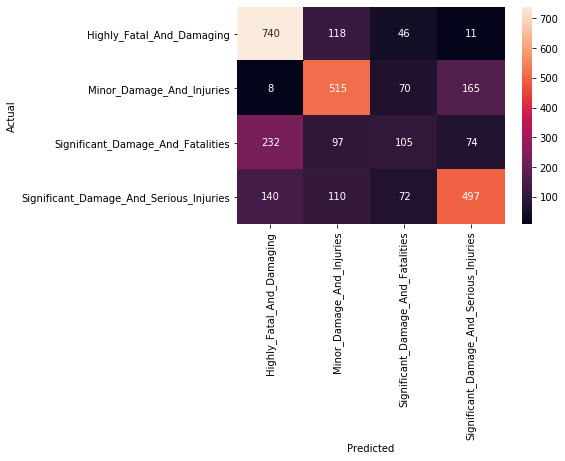

In [79]:
m = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(m, annot=True, fmt="d")

In [90]:
mat = sensi(m)
mat

,Senstivity,Specificity
Highly_Fatal_And_Damaging,0.660714,0.864551
Minor_Damage_And_Injuries,0.613095,0.986765
Significant_Damage_And_Fatalities,0.358362,1.152632
Significant_Damage_And_Serious_Injuries,0.665328,0.808561


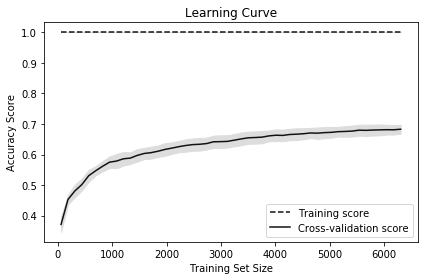

In [60]:
train_sizes, train_scores, test_scores = learning_curve(neigh, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 9. Logistic Regression

In [62]:
from sklearn import linear_model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred=mul_lr.predict(X_test)

In [65]:
print("Accuracy is :" , accuracy_score(y_test, y_pred))

Accuracy is : 0.619


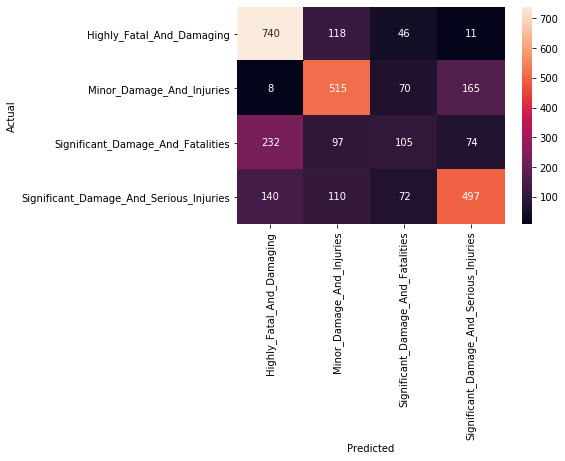

In [80]:
m = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(m, annot=True, fmt="d")

In [91]:
mat = sensi(m)
mat

,Senstivity,Specificity
Highly_Fatal_And_Damaging,0.660714,0.864551
Minor_Damage_And_Injuries,0.613095,0.986765
Significant_Damage_And_Fatalities,0.358362,1.152632
Significant_Damage_And_Serious_Injuries,0.665328,0.808561


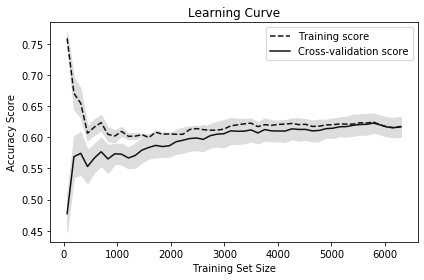

In [66]:
train_sizes, train_scores, test_scores = learning_curve(mul_lr,
                                                        X_train,
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()